In [7]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Read csv file
df = pd.read_csv("pokemon_alopez247.csv")
# Check empty values in all columns
column_names = [col for col in df.columns]

for col_name in column_names:
    # Check values if the columns has string
    if type(df[col_name][0]) is str:
        df[col_name] = df[col_name].fillna("Unkown")
    # Check values if the columns has numbers
    elif type(df[col_name][0]) is np.int64:
        df[col_name] = df[col_name].fillna(-1)

# Add 'Remark' column
df['Remarks'] = None

# Group by Type_1 and fill corresponding value in Remarks
df_group = df.groupby('Type_1')
for group in df_group.groups.keys():
    second_largest = df_group.get_group(group)['Total'].nlargest(2)
    df.at[second_largest.index[1], 'Remarks'] = df.at[second_largest.index[1], "Name"] + "_" + df.at[second_largest.index[1], "Type_1"] + "_" + df.at[second_largest.index[1], "Type_2"] + "_" + df.at[second_largest.index[1], "Color"]

# Sort by Total, Group by Type_1
df = df.groupby('Type_1').apply(lambda x:x.sort_values('Total'))
# Remove index column
df.reset_index(drop=True, inplace=True)
df.to_csv("Test.csv", sep='\t')
df.head(64)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,Remarks
0,401,Kricketot,Bug,Unkown,194,37,25,41,25,41,...,True,0.5,Bug,Unkown,False,0.30,2.2,255,bipedal_tailless,None
1,10,Caterpie,Bug,Unkown,195,45,30,35,20,20,...,True,0.5,Bug,Unkown,False,0.30,2.9,255,insectoid,None
2,13,Weedle,Bug,Poison,195,40,35,30,20,20,...,True,0.5,Bug,Unkown,False,0.30,3.2,255,serpentine_body,None
3,265,Wurmple,Bug,Unkown,195,45,45,35,20,30,...,True,0.5,Bug,Unkown,False,0.30,3.6,255,serpentine_body,None
4,664,Scatterbug,Bug,Unkown,200,38,35,40,27,25,...,True,0.5,Bug,Unkown,False,0.30,2.5,255,insectoid,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,213,Shuckle,Bug,Rock,505,20,10,230,10,230,...,True,0.5,Bug,Unkown,False,0.61,20.5,190,insectoid,None
60,469,Yanmega,Bug,Flying,515,86,76,86,116,56,...,True,0.5,Bug,Unkown,False,1.91,51.5,30,four_wings,None
61,637,Volcarona,Bug,Fire,550,85,60,65,135,105,...,True,0.5,Bug,Unkown,False,1.60,46.0,15,four_wings,Volcarona_Bug_Fire_White
62,649,Genesect,Bug,Steel,600,71,120,95,120,95,...,False,NaN,Undiscovered,Unkown,False,1.50,82.5,3,bipedal_tailless,None


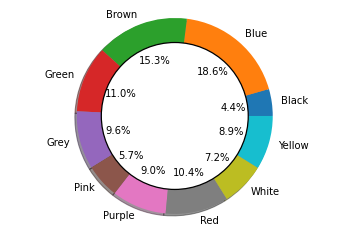

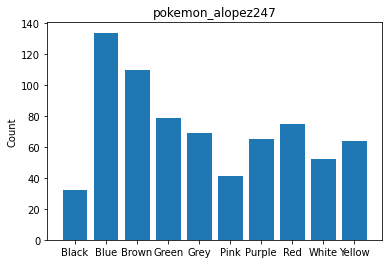

In [333]:
# Visualization

labels = list(df.groupby('Color').groups.keys())
sizes = list(df.groupby('Color').size())
colors = []

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()


# Bar Chart
y_pos = np.arange(len(labels))
plt.bar(y_pos, sizes)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('pokemon_alopez247')
plt.show()